### Optativa: Optimización en la Industria / MHs
### UNSL - 2023
### ***Fabrizio Riera Bauer***
# Práctico 4:
## Evolucion Diferencial (Inicial)

_________________________

$\mathbf{Ejercicio} \,\,1$: Codificar en lenguaje Python el algoritmo de Evolución Diferencial explicado en la teoría según el esquema $DE/rand/1/bin$. Lo vamos a llamar "de.py". Usar como guía el código provisto, el cual está escrito en Lenguaje C y el enlace (https://machinelearningmastery.com/differential-evolution-from-scratch-in-python/#:~:text=Differential%20evolution%20is%20a%20heuristic,family%20of%20evolutionary%20computing%20algorithms).

La función objetivo a optimizar (minimizar) será la siguiente:


$$
f(x_1, \dots, x_n) =  \sum_{i=1}^{n} x^2_{i} / n,
$$

donde: $-5 \leq x_i \leq 5$ para $i=1, \dots, n$ y $n$ es un argumento de entrada.

Realizar ejecuciones de de.py para comprobar su funcionamiento respecto a la función objetivo usando un conjunto de valores de parámetros por omisión (valores default) para $F$, $C_r$, $N_p$ y número de generaciones. Considere los valores de $n=10, 50, 100$.  Tenga en cuenta que el punto óptimo de esta función, independientemente del $n$, se encuentra en $(0, \dots,0)$.

---

$\mathbf{Respuesta}$

In [1]:
#  IMPORTS
import numpy as np
import random
import math

GENERATION_MAX = 150


# LARGO DE VECTOR
n = 100
#  CANTIDAD DE INDIVIDUOS
Np = 30
#  DIMENSIONES
D = n
#  FUNCION OBJETIVO
def fobj(x):
    return np.sum(np.power(x, 2.0))/len(x)

#  LIMITES
bounds = [(-5,5)] * D

Cr = 0.5
F = 0.75

def create_population(population_size, bounds, chromosome_lenght):
    return np.array([np.array([bounds[j][0]+np.random.rand()*(bounds[j][1]-bounds[j][0]) for j in range(chromosome_lenght)]) for i in range(population_size)])


#  POBLACION INICIAL
population = create_population(Np,bounds,n)
found = False
r0,r1,r2 = 0,0,0

scores = []
for i in range(Np):
    scores.append(fobj(population[i]))

generation = 0
while(not found):
    for i in range(0,Np):
        while (r0 == i):
            r0 = math.floor(np.random.rand()*Np)
        while (r1 == r0 or r1 == i):
            r1 = math.floor(np.random.rand()*Np)
        while (r2 == r1 or r2 == r0 or r2 == i):
            r2 = math.floor(np.random.rand()*Np)

        jrandom = math.floor(D*np.random.rand())

        u = []
        for j in range(0,D):
            if (np.random.rand() <= Cr or j == jrandom):
                temp = population[r0][j]+(F*(population[r1][j]-population[r2][j]))
                # CONTROL DE LIMITES
                if temp < bounds[0][0]:
                    temp = bounds[0][0]
                if temp > bounds[0][1]:
                    temp = bounds[0][1]
                u.append(temp)
            else:
                u.append(population[i][j])


        if fobj(u) <= fobj(population[i]):
            population[i] = u
        scores[i] = fobj(population[i]);

    if np.min(scores) == 0 or generation==GENERATION_MAX:
        found = True
    generation += 1

print()
print()
print('Mejor solucion', population[scores.index(np.min(scores))])
print('Valor objetivo mejor solucion', "%.10lf"% (fobj(population[scores.index(np.min(scores))])))

ModuleNotFoundError: No module named 'numpy'

_________________________

$\mathbf{Ejercicio} \,\,2$: Modifique el algoritmo "de.py" codificado en el punto anterior para que muestre cada 20 generaciones y de manera interactiva, la curva de avance del algoritmo a partir de los valores máximo, mínimo y promedio de la función objetivo. Esto es a los efectos de mostrar gráficamente el avance del algoritmo ya que puede resultar de interés ver su comportamiento con diferentes parámetros como $Cr$ y $F$ de DE a medida que avanza en la evolución.
NOTA: tener en cuenta uso de librerías como "matlplotlib" y los enlaces enviados por mail.

---

$\mathbf{Respuesta}$




Mejor solucion [-0.14780978  0.0351262  -0.00933067  0.15748557  0.13239344 -0.01005346
  0.12158639 -0.11797365  0.2990799  -0.06406272]
Valor objetivo mejor solucion 0.0187853293
[0, 20, 40, 60, 80, 100, 120, 140]


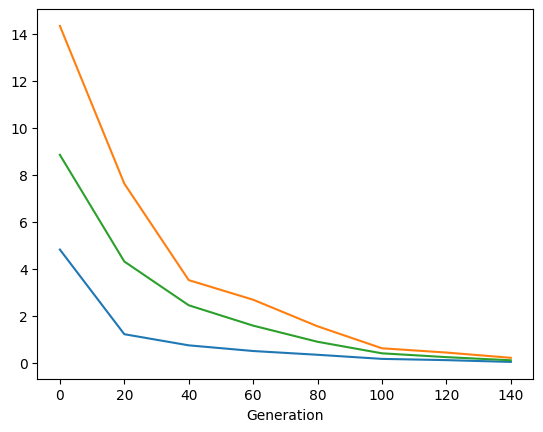

In [21]:
#  IMPORTS
import numpy as np
import random
import math

GENERATION_MAX = 150

# LARGO DE CROMOSOMA
n = 10
#  CANTIDAD DE INDIVIDUOS
Np = 30
#  DIMENSIONES
D = n
#  FUNCION OBJETIVO
def fobj(x):
    return np.sum(np.power(x, 2.0))/len(x)

#  LIMITES
bounds = [(-5,5)] * D

Cr = 0.5
F = 1

def create_population(population_size, bounds, chromosome_lenght):
    return np.array([np.array([bounds[j][0]+np.random.rand()*(bounds[j][1]-bounds[j][0]) for j in range(chromosome_lenght)]) for i in range(population_size)])


#  POBLACION INICIAL
population = create_population(Np,bounds,n)
found = False
r0,r1,r2 = 0,0,0
sMin,sMax,sProm,sGen = [],[],[],[]

scores = []
for i in range(Np):
    scores.append(fobj(population[i]))

generation = 0
while(not found):

    if generation % 20 == 0:
        sMin.append(np.min(scores))
        sMax.append(np.max(scores))
        sProm.append(np.average(scores))
        sGen.append(generation)

    for i in range(0,Np):
        while (r0 == i):
            r0 = math.floor(np.random.rand()*Np)
        while (r1 == r0 or r1 == i):
            r1 = math.floor(np.random.rand()*Np)
        while (r2 == r1 or r2 == r0 or r2 == i):
            r2 = math.floor(np.random.rand()*Np)

        jrandom = math.floor(D*np.random.rand())

        u = []
        for j in range(0,D):
            if (np.random.rand() <= Cr or j == jrandom):
                temp = population[r0][j]+(F*(population[r1][j]-population[r2][j]))
                # CONTROL DE LIMITES
                if temp < bounds[0][0]:
                    temp = bounds[0][0]
                if temp > bounds[0][1]:
                    temp = bounds[0][1]
                u.append(temp)
            else:
                u.append(population[i][j])


        if fobj(u) <= fobj(population[i]):
            population[i] = u
        scores[i] = fobj(population[i]);

    if np.min(scores) == 0 or generation==GENERATION_MAX:
        found = True

    generation += 1

print()
print()
print('Mejor solucion', population[scores.index(np.min(scores))])
print('Valor objetivo mejor solucion', "%.10lf"% (fobj(population[scores.index(np.min(scores))])))


import matplotlib.pyplot as plt
plt.plot(sGen, sMin)
plt.plot(sGen, sMax)
plt.plot(sGen, sProm)
print(sGen)
plt.xlabel('Generation')
plt.show()